Prediction Table for Maximum Profit and Maximum Supply:
    Price  Demand Quantity  Supply Quantity  Revenue
0      10               80               35      800
1      11               78               38      858
2      12               76               41      912
3      13               74               44      962
4      14               72               47     1008
5      15               70               50     1050
6      16               68               53     1088
7      17               66               56     1122
8      18               64               59     1152
9      19               62               62     1178
10     20               60               65     1200
11     21               58               68     1218
12     22               56               71     1232
13     23               54               74     1242
14     24               52               77     1248
15     25               50               80     1250
16     26               48               83

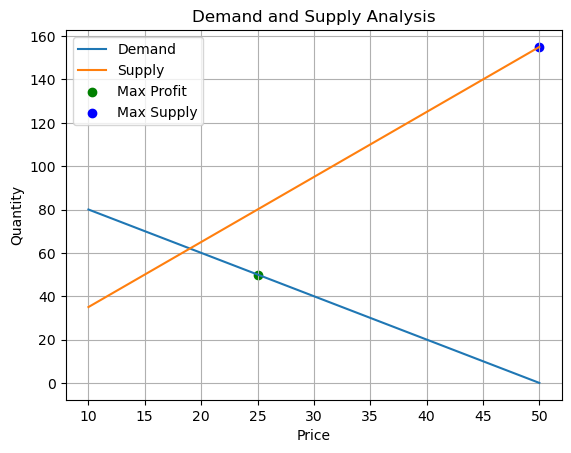

Equilibrium price: $19
Equilibrium quantity: 62
Price for maximum profit: $25
Price for maximum supply: $50


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def demand(price):
    demand_quantity = 100 - 2 * price
    return demand_quantity

def supply(price):
    supply_quantity = 5 + 3 * price
    return supply_quantity

def revenue(price):
    return price * demand(price)

# Create a NumPy array for the price range
price_range = np.arange(10, 51)

data = {'price': price_range,
        'demand_quantity': demand(price_range),
        'supply_quantity': supply(price_range)}
df = pd.DataFrame(data)

# Find the equilibrium point using boolean indexing
equilibrium_condition = df['demand_quantity'] == df['supply_quantity']
equilibrium_df = df[equilibrium_condition]

equilibrium_price = equilibrium_df['price'].values[0] if not equilibrium_df.empty else None
equilibrium_quantity = equilibrium_df['demand_quantity'].values[0] if not equilibrium_df.empty else None

# Calculate revenue and supply predictions
revenue_values = revenue(price_range)
max_profit_price = price_range[np.argmax(revenue_values)]
max_supply_price = price_range[np.argmax(df['supply_quantity'])]

# Create a prediction table for max profit and max supply
prediction_data = {
    'Price': price_range,
    'Demand Quantity': demand(price_range),
    'Supply Quantity': supply(price_range),
    'Revenue': revenue_values
}
prediction_df = pd.DataFrame(prediction_data)

# Print the prediction table
print("Prediction Table for Maximum Profit and Maximum Supply:")
print(prediction_df)

# Plotting using matplotlib
plt.plot(df['price'], df['demand_quantity'], label="Demand")
plt.plot(df['price'], df['supply_quantity'], label="Supply")

# if equilibrium_price:
#     plt.scatter(equilibrium_price, equilibrium_quantity, color="red", label="Equilibrium")

plt.scatter(max_profit_price, demand(max_profit_price), color="green", label="Max Profit", marker="o")
plt.scatter(max_supply_price, supply(max_supply_price), color="blue", label="Max Supply", marker="o")

plt.xlabel("Price")
plt.ylabel("Quantity")
plt.title("Demand and Supply Analysis")
plt.legend()

plt.grid(True)
plt.show()

if equilibrium_price:
    print(f"Equilibrium price: ${equilibrium_price}")
    print(f"Equilibrium quantity: {equilibrium_quantity}")
else:
    print("No equilibrium point found within the price range.")

print(f"Price for maximum profit: ${max_profit_price}")
print(f"Price for maximum supply: ${max_supply_price}")
